# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import Binarizer

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [2]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

C:\Users\talt\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:26: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


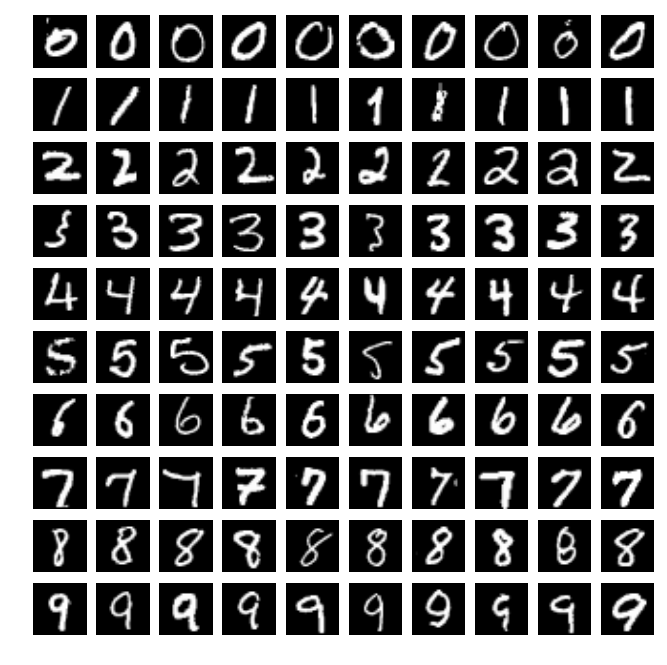

In [3]:
def P1(num_examples=10):

    ### STUDENT START ###

    # Creating the plot with colormap and size
    plt.rc('image', cmap='gray')
    plt.rc('figure', figsize=[8,8])

    # Creating list indices of data with labels 0 through 9
    gridsize = 10
    gridsq = gridsize * gridsize
    indexdata = np.empty(gridsq)

    for i in range(0, gridsize):
        count = 0
        while(count < gridsize):
            r = np.random.randint(0, 60000)
            if ((int(train_labels[r])) == i):
                indexdata[((i*10)+count)]=r
                count=count+1

    # Ploting a 10 X 10 grid with images
    for i in range(0, gridsq):
        axisplot = plt.subplot(gridsize, gridsize, i+1) 
        axisplot.set_axis_off()
        mat = np.reshape(train_data[(indexdata[i])], (28, 28))
        axisplot.imshow(mat)
    plt.show()

    ### STUDENT END ###

P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [5]:
def P2(k_values):

    ### STUDENT START ###

    #Set the initial k values
    k_values=[1, 3, 5, 7, 9]

    #Execute the nearest neighbor classifier
    for k in k_values:
        kclass = KNeighborsClassifier(k)
        
        # Train with the mini training data
        kclass.fit(mini_train_data, mini_train_labels)
        
        # Making predictions 
        prediction = kclass.predict(dev_data)
        
        # Comparing predicted labels with actual labels
        accuracy=kclass.score(dev_data, dev_labels)
        print ("Predicted Nearest Neighbor accuracy for k value of "+str(k)+" is "+str(accuracy))

    print("Classification report for %s:\n%s\n"% (kclass, classification_report(dev_labels, prediction)))
    
    ### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

Predicted Nearest Neighbor accuracy for k value of 1 is 0.888
Predicted Nearest Neighbor accuracy for k value of 3 is 0.878
Predicted Nearest Neighbor accuracy for k value of 5 is 0.869
Predicted Nearest Neighbor accuracy for k value of 7 is 0.865
Predicted Nearest Neighbor accuracy for k value of 9 is 0.863
Classification report for KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform'):
             precision    recall  f1-score   support

        0.0       0.91      0.98      0.94        99
        1.0       0.73      1.00      0.84       105
        2.0       0.97      0.75      0.85       102
        3.0       0.80      0.85      0.82        86
        4.0       0.91      0.81      0.86       104
        5.0       0.97      0.79      0.87        91
        6.0       0.92      0.93      0.92        98
        7.0       0.83      0.88      0.85       113
        8.0       0.9

ANSWER: The digit with the lowest F-1 score is "9", however "1" in this case has the lowest precision score making it the most difficult to classify.

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [43]:
def P3(train_sizes, accuracies):

    ### STUDENT START ###
    train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
    accuracies = []
    kclass = KNeighborsClassifier(1)
    
    for train_size in train_sizes:
        # Train the model with the training data set 
        shuffle = np.random.permutation(np.arange(train_data.shape[0]))
        p3_data, p3_label = train_data[shuffle], train_labels[shuffle]
        p3_data, p3_label = p3_data[:train_size], p3_label[:train_size]
    
        starttime = time.time()
        kclass.fit(p3_data, p3_label)
        
        # Make predictions for the data in dev dataset 
        prediction = kclass.predict(dev_data)
        endtime = time.time()

        # Compare predicted labels with actual labels
        accuracy = kclass.score(dev_data, dev_labels)
        accuracies.append(accuracy)
        print ("Predicted Nearest Neighbor accuracy for "+str(train_size)+" records is "+str(accuracy)+" in "+str(endtime-starttime)+" seconds.")

    ### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)

Predicted Nearest Neighbor accuracy for 100 records is 0.466 in 0.10700631141662598 seconds.
Predicted Nearest Neighbor accuracy for 200 records is 0.57 in 0.24801397323608398 seconds.
Predicted Nearest Neighbor accuracy for 400 records is 0.643 in 0.4710268974304199 seconds.
Predicted Nearest Neighbor accuracy for 800 records is 0.717 in 1.0120577812194824 seconds.
Predicted Nearest Neighbor accuracy for 1600 records is 0.745 in 2.050117254257202 seconds.
Predicted Nearest Neighbor accuracy for 3200 records is 0.782 in 4.792273998260498 seconds.
Predicted Nearest Neighbor accuracy for 6400 records is 0.817 in 8.041459798812866 seconds.
Predicted Nearest Neighbor accuracy for 12800 records is 0.845 in 16.397938013076782 seconds.
Predicted Nearest Neighbor accuracy for 25000 records is 0.866 in 33.24890184402466 seconds.


(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

Accuracy predicted for n = 60000 is 1.301.
Variance score: 0.501.
Residual sum of squares: 0.0070.


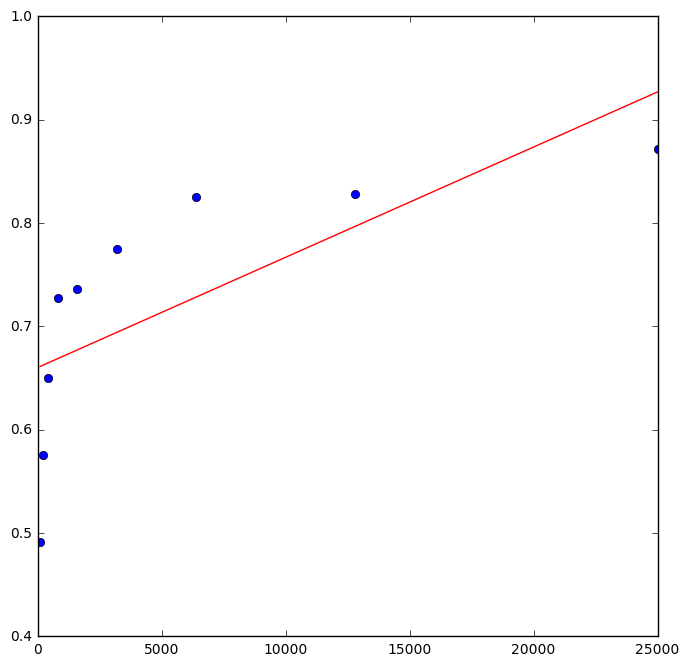

In [48]:
def P4():

    ### STUDENT START ###
    train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
    accuracies = []
    kclass = KNeighborsClassifier(1)
    
    for train_size in train_sizes:
    # Train the model with the training data set 
        shuffle = np.random.permutation(np.arange(train_data.shape[0]))
        p3_data, p3_label = train_data[shuffle], train_labels[shuffle]
        p3_data, p3_label = p3_data[:train_size], p3_label[:train_size]

        starttime = time.time()
        kclass.fit(p3_data, p3_label)
        
        # Make predictions for the data in dev dataset 
        prediction = kclass.predict(dev_data)
        endtime = time.time()

        # Compare predicted labels with actual labels
        accuracy = kclass.score(dev_data, dev_labels)
        accuracies.append(accuracy)
    
    #Change lists into np arrays3
    train_sizes_array = np.transpose([train_sizes])
    accuracies_array = np.transpose([accuracies])

    #Fit the linear regression
    lr = LinearRegression(fit_intercept=True)
    lr.fit(train_sizes_array, accuracies_array)
    print ('Accuracy predicted for n = 60000 is %.3f' % (lr.coef_ * 60000 + lr.intercept_)+".")
    
    #Get the R-square for this model
    print('Variance score: %.3f' % lr.score(train_sizes_array, accuracies_array)+".")
    
    # Get the mean square error
    print("Residual sum of squares: %.4f" % np.mean((lr.predict(train_sizes_array) - accuracies_array) ** 2)+".")

    plt.plot(train_sizes, accuracies, 'bo', label='line 1', linewidth=2)
    plt.plot(train_sizes_array, lr.predict(train_sizes_array),color='red')
    plt.show()

    ### STUDENT END ###

P4()

ANSWER: This model predicts an accuracy of 1.30, or 130%.  This is troublesome since the value exceeds 100%.  A transformation would need to be made in order to have a valid accuracy, such as a constraining transformaion (y = 1/(1-x)) or a logarithmic function to produce a valid accuracy calculation (see below for logarithm transformation).

Accuracy predicted for n = 60000 is 0.890.
Variance score: 0.997.
Residual sum of squares: 0.0000.


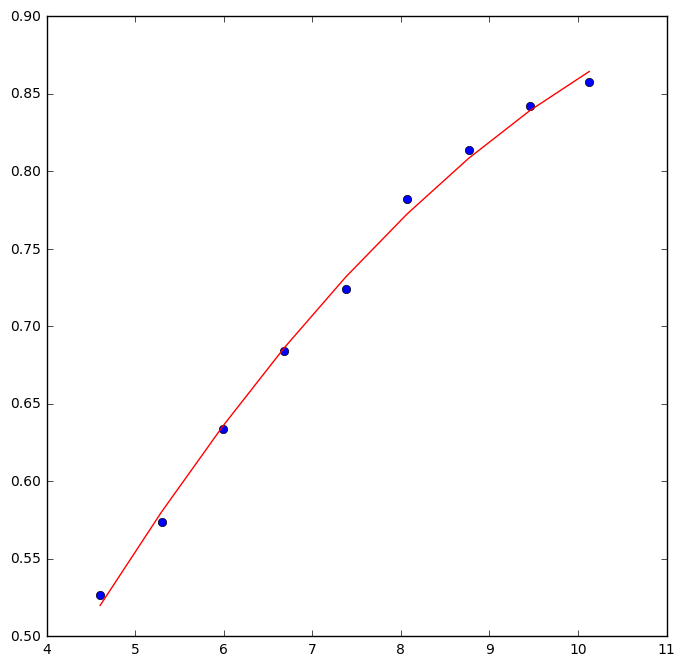

In [51]:
train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
kclass = KNeighborsClassifier(1)

for train_size in train_sizes:
# Train the model with the training data set 
    shuffle = np.random.permutation(np.arange(train_data.shape[0]))
    p3_data, p3_label = train_data[shuffle], train_labels[shuffle]
    p3_data, p3_label = p3_data[:train_size], p3_label[:train_size]

    starttime = time.time()
    kclass.fit(p3_data, p3_label)

    # Make predictions for the data in dev dataset 
    prediction = kclass.predict(dev_data)
    endtime = time.time()

    # Compare predicted labels with actual labels
    accuracy = kclass.score(dev_data, dev_labels)
    accuracies.append(accuracy)


train_sizes_array = np.transpose([np.log(train_sizes)])
train_sizes_array2 = np.concatenate((train_sizes_array, train_sizes_array**2), axis=1)
#train_sizes_array = np.transpose([np.log(train_sizes)])
accuracies_array = np.transpose([accuracies])

#Fitting  the linear regression
lr = LinearRegression(fit_intercept=True)
lr.fit(train_sizes_array2, accuracies_array)
print ('Accuracy predicted for n = 60000 is %.3f' % (lr.coef_[0][0] * np.log(60000) + lr.coef_[0][1] * np.log(60000)**2 + lr.intercept_)+".")

#Getting the R-square for this model
print('Variance score: %.3f' % lr.score(train_sizes_array2, accuracies_array)+".")

# Getting the mean square error
print("Residual sum of squares: %.4f" % np.mean((lr.predict(train_sizes_array2) - accuracies_array) ** 2)+".")

plt.plot(train_sizes_array, accuracies_array, 'bo', label='line 1', linewidth=2)
plt.plot(train_sizes_array, lr.predict(train_sizes_array2),color='red')
plt.show()

P4 Answer Continued: The accuracy calculation for a logarithm transformation is 0.890, which is a much more reasonable calculation.

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

Confusion Matrix:
[[ 83   5   0   0   1   4   5   1   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  3  20  51   3   1   6   1   8   4   5]
 [  1  14   0  58   2   5   3   0   1   2]
 [  1  11   0   1  67   4   1   2   0  17]
 [  1  19   0  12   0  48   2   3   1   5]
 [  6  12   0   1   4   4  70   0   0   1]
 [  2  16   1   0   1   3   0  86   0   4]
 [  0  24   1   7   3   6   1   0  48   6]
 [  2   7   0   1  13   1   0  17   0  65]]


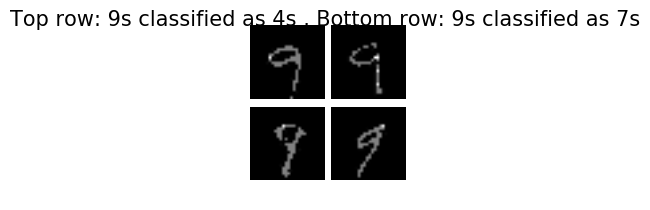

In [56]:
def P5():

### STUDENT START ###

    # Fit model and get predictions
    kclass = KNeighborsClassifier(n_neighbors=1)
    kclass.fit(mini_train_data, mini_train_labels)
    kpred = kclass.predict(dev_data)

    # Print the confusion matrix
    print ('Confusion Matrix:')
    print (confusion_matrix(y_true=dev_labels, y_pred=kpred, labels= range(10)))    

    # Print examples of mislabeled 9s (two 9s as 3s and two 9s as 7s)
    fig, ax = plt.subplots(2, 2, figsize=(2,2))
    
    num_as3, num_as7 = 0, 0 # aux for keeping track of examples plotted
    
    for i, label in enumerate(dev_labels):
        if label == 9:
            
            # If 9 mislabeled as 4
            if kpred[i] == 4 and num_as3 < 2:
                ax[0,num_as3].imshow(dev_data[i].reshape(28,28), cmap=plt.cm.gray)
                ax[0,num_as3].axis('off')
                num_as3 += 1

            # If 9 mislabeled as 7
            if kpred[i] == 7 and num_as7 < 2:
                ax[1,num_as7].imshow(dev_data[i].reshape(28,28), cmap=plt.cm.gray)
                ax[1,num_as7].axis('off')
                num_as7 += 1
            
            if num_as3 + num_as7 >= 4:
                break

    fig.suptitle('Top row: 9s classified as 4s , Bottom row: 9s classified as 7s', size=15)
    fig.subplots_adjust(wspace=.1, hspace=.1)
    
### STUDENT END ###

P5()

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

In [25]:
#Creating the blur filters and applying it to the data set

def blurring(digits_to_plot):
    digits_to_plot = digits_to_plot.reshape((28,28))
    digits_blurred = np.zeros((28, 28))
    for i in range(0, 27):
        for j in range(0, 27):
            digits_blurred[i,j] = digits_to_plot[i - 1,j - 1] + digits_to_plot[i - 1,j] + digits_to_plot[i - 1,j + 1] + digits_to_plot[i,j + 1] + digits_to_plot[i + 1,j + 1] + digits_to_plot[i + 1,j] + digits_to_plot[i + 1,j -1] + digits_to_plot[i,j - 1]        
    i = 27
    for j in range(0, 27):
            digits_blurred[i,j] = digits_to_plot[i - 1,j - 1] + digits_to_plot[i - 1,j] + digits_to_plot[i - 1,j + 1] + digits_to_plot[i,j + 1]+ digits_to_plot[i,j - 1]        
    j = 27
    for i in range(0, 27):
            digits_blurred[i,j] = digits_to_plot[i - 1,j - 1] + digits_to_plot[i - 1,j] + digits_to_plot[i + 1,j] + digits_to_plot[i + 1,j -1] + digits_to_plot[i,j - 1]        
    i, j = 27, 27
    digits_blurred[i,j] = digits_to_plot[i - 1,j - 1] + digits_to_plot[i - 1,j] + digits_to_plot[i,j - 1]
    return(digits_blurred.ravel())

train_data_blurred = [blurring(digits_to_plot) for digits_to_plot in train_data]
dev_data_blurred = [blurring(digits_to_plot) for digits_to_plot in dev_data]

In [57]:
def P6():

    #Running the different blur filters

    kn = KNeighborsClassifier(n_neighbors = 1)
    kn.fit(train_data_blurred, train_labels)
    predicted_labels = kn.predict(dev_data)
    print ('Preprocessed train_data accuracy: %3.2f' %(kn.score(dev_data, dev_labels))+".")

    kn = KNeighborsClassifier(n_neighbors = 1)
    kn.fit(train_data, train_labels)
    predicted_labels = kn.predict(dev_data_blurred)
    print ('Preprocessed dev_data accuracy: %3.2f' %(kn.score(dev_data_blurred, dev_labels))+".")

    kn = KNeighborsClassifier(n_neighbors = 1)
    kn.fit(train_data_blurred, train_labels)
    predicted_labels = kn.predict(dev_data_blurred)
    print ('Preprocessed train_data and dev_data accuracy: %3.2f' %(kn.score(dev_data_blurred, dev_labels))+".")

    ### STUDENT END ###

P6()

Preprocessed train_data accuracy: 0.13.
Preprocessed dev_data accuracy: 0.65.
Preprocessed train_data and dev_data accuracy: 0.98.


ANSWER: While this took a very long time to calculate, the accuracy for preprocessing both datasets yielded the highest accuracy.  Only processing the training data was the lowest.

Note: I ran this with a different blurring algorithm, and the accuracies were a little different.  Preprocessing both datasets though consistently yielded the best result, and preprocessing only the training data yielded the lowest in both cases.

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [61]:
def P7():

    ### STUDENT START : ###
    # BernoulliNB
    # Mapping the pixel values to either 0 or 1; If the value is less than 0.1 then use 0, else 1
    BNBtrain_data = Binarizer(0.1).transform(train_data)
    BNBdev_data = Binarizer(0.1).transform(dev_data)
    BNBkclass = BernoulliNB()
    
    # Train the classifier with the training data
    BNBkclass.fit(BNBtrain_data, train_labels)
    BNBprediction = BNBkclass.predict(BNBdev_data)
    
    # Compare predicted labels with actual labels
    BNBaccuracy = BNBkclass.score(BNBdev_data, dev_labels)
    print("Accuracy for BernoulliNB is "+str(BNBaccuracy)+".")

    # MultinomialNB
    # Mapping the pixel values to 0, 1 or 2; If the value is less than 0.1 then use 0, if the value is betwen 0.1 and 0.9 use 1 else 2
    MNBtrain_data = train_data
    binplace = np.digitize(MNBtrain_data, bins=[0.1, 0.9, 1.0])
    MNBtrain_data[np.where(binplace == 1)] = 0
    MNBtrain_data[np.where(binplace == 2)] = 1
    MNBtrain_data[np.where(binplace == 3)] = 2

    MNBdev_data = dev_data
    binplace1 = np.digitize(MNBdev_data, bins=[0.1, 0.9, 1.0])
    MNBdev_data[np.where(binplace1 == 1)] = 0
    MNBdev_data[np.where(binplace1 == 2)] = 1
    MNBdev_data[np.where(binplace1 == 3)] = 2

    # Training the classifier with the training data
    MNBclf = MultinomialNB()
    MNBclf.fit(MNBtrain_data, train_labels)
    MNBprediction = MNBclf.predict(MNBdev_data)
    
    # Compare predicted labels with actual labels
    MNBaccuracy = MNBclf.score(MNBdev_data, dev_labels)
    print("Predicted accuracy for MultinomialNB is "+str(MNBaccuracy)+".")

    ### STUDENT END ###

P7()

Accuracy for BernoulliNB is 0.82.
Predicted accuracy for MultinomialNB is 0.828.


ANSWER:  The predicted accuracy for pixel values of 0 or 1 is 0.82.  If we extend this to 0, 1, and 2, the accuracy increases slightly to 0.828.  My guess is that the multinomial would result in a bimodal dataset, where most of the data would aggregate at zero or one, and therefore would be lower.  That is not the case here.  

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [62]:
def P8(alphas):

    ### STUDENT START ###

    alphas = {'alpha':[0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
    ber = BernoulliNB(binarize = 0.5)
    clf = GridSearchCV(ber, alphas)
    clf.fit(train_data, train_labels)

    for a in alphas['alpha']:
        ber = BernoulliNB(binarize = 0.5, alpha = a)
        ber.fit(train_data, train_labels)
        print ('Bernoulli with alpha of %.4f yields an accuracy of: %3.4f' %(a, ber.score(dev_data, dev_labels))+".")

    ### STUDENT END ###

P8(alphas)

Bernoulli with alpha of 0.0001 yields an accuracy of: 0.8200.
Bernoulli with alpha of 0.0010 yields an accuracy of: 0.8190.
Bernoulli with alpha of 0.0100 yields an accuracy of: 0.8190.
Bernoulli with alpha of 0.1000 yields an accuracy of: 0.8190.
Bernoulli with alpha of 0.5000 yields an accuracy of: 0.8190.
Bernoulli with alpha of 1.0000 yields an accuracy of: 0.8200.
Bernoulli with alpha of 2.0000 yields an accuracy of: 0.8200.
Bernoulli with alpha of 10.0000 yields an accuracy of: 0.8160.


ANSWER: The best alpha's are 0.0001, 1, and 2, but the accuracies are all very similar.  I'm not sure about the alpha that is equal to zero.  I had to delete it from the calculation because I kept getting "Divide by zero" errors.  My guess would be that the accuracy would be low because that would mean no smoothing is occurring. 

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [63]:
def P9():   

    ### STUDENT START ###
    import sklearn.preprocessing as pp
    
    gau = GaussianNB()
    gauparam = gau.fit(train_data, train_labels)
    GNBprediction1 = gau.predict(dev_data)
    
    # Compare predicted labels with actual labels
    GNBaccuracy1 = gau.score(dev_data, dev_labels)
    print("Accuracy for GaussianNB is "+str(GNBaccuracy1)+".")



    scaledtrain_data = pp.normalize(train_data)
    scaleddev_data = pp.normalize(dev_data)
    gau.fit(scaledtrain_data, train_labels)
    GNBprediction2 = gau.predict(scaleddev_data)
    GNBaccuracy2 = gau.score(scaleddev_data, dev_labels)
    print("Accuracy for GaussianNB with normalization is "+str(GNBaccuracy2)+".")
    
    ### STUDENT END ###

P9()

Accuracy for GaussianNB is 0.562.
Accuracy for GaussianNB with normalization is 0.577.


ANSWER: The GaussianNB was lower than the normalized GaussianNB accuracy.  My guess is because of the values within each pixel contain many zeros, the variance is small.  Anything that differs from this (very small) mean will be classified incorrectly.  By normalizing, we are compensating for this effect, which increases the accuracy in the second (normalized) calculation.

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

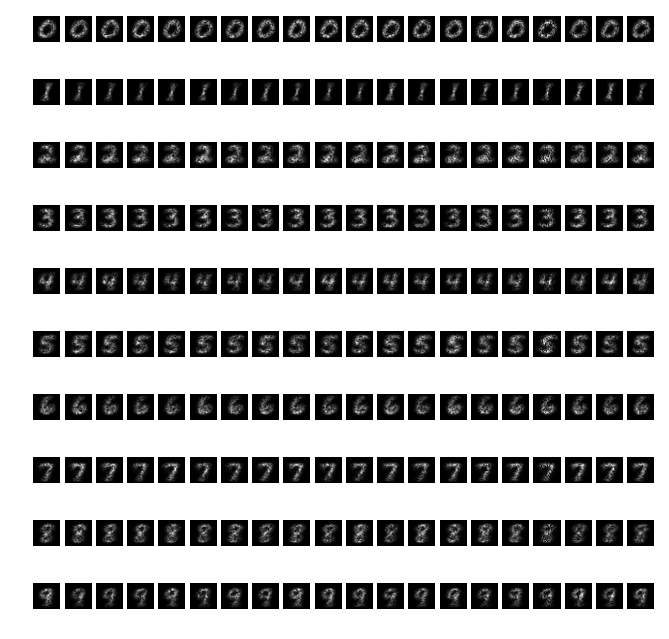

In [64]:
def P10(num_examples):

    ### STUDENT START ###
    # Training the BernoulliNB classifier
    BNBtrain_data = Binarizer(0.5).transform(train_data)
    BNBdev_data = Binarizer(0.5).transform(dev_data)
    BNB = BernoulliNB()
   
    # Making predictions
    BNB.fit(BNBtrain_data, train_labels)

    # Generating image data based on the trained data
    num_features = 784

    # Number of samples per digit
    num_samples = 20

    # Number of digits
    num_digits = 10

    # Initializing an array with zeroes
    gen_data = np.zeros(((num_samples*num_digits), num_features))

    # For each digit 0 through 9
    for digit in range (0, num_digits):

        # Generate image data for 20 samples
        for sample in range (0, num_samples):
            
            # Generate the 784 feature values
            for feature in range (0, num_features):
                continuewithfeature = True

                # The estimated probability of each pixel
                prob = np.exp(BNB.feature_log_prob_[digit][feature])
                while(continuewithfeature):

                    # Randomly generated feature data
                    r = np.random.rand()

                    # Use the random value if it is less than the estimated probability, otherwise re-generate
                    if(r < prob):
                        gen_data[((digit*num_samples)+sample)][feature] = r
                        continuewithfeature = False

            # Plot the data  with the generated dataset
            ax = plt.subplot(num_digits, num_samples, (((digit*num_samples)+sample)+1))
            ax.set_axis_off()
            mat = np.reshape(gen_data[((digit*num_samples)+sample)], (28, 28))
            ax.imshow(mat)

    ### STUDENT END ###

P10(20)

ANSWER: The trained digits look more blurry and less of a continuous line than the training digits, especially in the digits like 8 and 9.  From above, the digits one and four seem to have the most "cloudiness", whereas the zeros and sevens seem most clear.

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [65]:
def P11():

    ### STUDENT START ###
    ber = BernoulliNB(binarize = 0.5)
    ber.fit(train_data, train_labels)

    probas_predict = np.zeros(dev_data.shape[0])
    corrects = np.zeros(dev_data.shape[0])

    for i in range (0, dev_data.shape[0]):
        proba_predict = ber.predict_proba(dev_data)
        index = proba_predict[i].argmax()
        probas_predict[i] = (proba_predict[i, index])
        if index == dev_labels[i]: 
            corrects[i] = 1
        else: 
            corrects[i] = 0

    buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
    array_bins = np.digitize(probas_predict, buckets)
    total = np.bincount(array_bins)
    correct = np.bincount(array_bins, weights = corrects)

    for i in range(len(buckets)):
        accuracy = 0.0
        if (total[i] > 0): accuracy = correct[i] / total[i]
        print ('p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy))

    ### STUDENT END ###

P11()

p(pred) <= 0.5000000000000    total =   4    accuracy = 0.250
p(pred) <= 0.9000000000000    total =  73    accuracy = 0.425
p(pred) <= 0.9990000000000    total = 135    accuracy = 0.556
p(pred) <= 0.9999900000000    total = 137    accuracy = 0.745
p(pred) <= 0.9999999000000    total = 109    accuracy = 0.890
p(pred) <= 0.9999999990000    total =  92    accuracy = 0.870
p(pred) <= 0.9999999999900    total =  81    accuracy = 0.889
p(pred) <= 0.9999999999999    total =  64    accuracy = 0.938
p(pred) <= 1.0000000000000    total =  25    accuracy = 1.000


ANSWER:  From the initial calculations, it looks like this is a strongly calibrated model.  However, we have to keep in mind that Naive Bayes is not independent, so our assumptions about an independent model have to be questioned.  Models built on these (inaccurate) assumptions would result in extreme probabilities (close to zero and/or one), but the accuracies do not align with the probabilities.

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [18]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()